# Understanding Excited States with VQE and Qiskit-Nature

## 1. What are Excited States?

While the ground state is the lowest energy state of a quantum system, excited states are higher-energy configurations that play crucial roles in:
- Chemical reactions
- Spectroscopy and light absorption
- Photochemistry
- Electronic transitions

Molecules can absorb energy and transition from their ground state to excited states, which have different electronic configurations, bond strengths, and molecular properties.

## 2. Challenges of Calculating Excited States

Excited states present unique computational challenges:
- They require more sophisticated quantum algorithms than ground state calculations
- Traditional VQE focuses only on finding the lowest energy (ground) state
- We need methods to prevent the algorithm from converging back to the ground state
- Multiple excited states may be closely spaced in energy

## 3. Methods for Calculating Excited States with Quantum Computing

Several approaches have been developed for NISQ devices:

### 3.1 Quantum Subspace Expansion (QSE)
- Uses the ground state VQE wavefunction as a reference
- Constructs a small subspace by applying excitation operators
- Diagonalizes the Hamiltonian in this subspace to find excited states

### 3.2 Orthogonality Constrained VQE (OC-VQE)
- Adds penalty terms to ensure orthogonality to previously found states
- Iteratively finds excited states while maintaining orthogonality constraints

### 3.3 Subspace-Search VQE (SSVQE)
- Simultaneously optimizes for multiple eigenstates
- Uses a weighted cost function to order the states by energy

### 3.4 Quantum Equation of Motion (qEOM)
- Quantum analog of the classical EOM method
- Represents excited states as excitations from the ground state

## 4. Implementing Excited States Calculation with Qiskit-Nature

Let's implement an excited states calculation using Qiskit-Nature for the H₂ molecule, focusing on the QSE method (which is well-supported in Qiskit-Nature):


In [13]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import ParityMapper
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature.second_q.algorithms import QEOM, EvaluationRule
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit.primitives import Estimator

# 1. Set up the molecular system - H₂ with 0.735 Å bond length
driver = PySCFDriver(
    atom='H 0 0 0; H 0 0 0.735',
    unit=DistanceUnit.ANGSTROM,
    basis='sto3g',  # Minimal basis set
)
problem = driver.run()

# 2. Set up the qubit mapper - ParityMapper can reduce qubit count
mapper = ParityMapper(num_particles=problem.num_particles)

# 3. Calculate the ground state using NumPy solver
numpy_solver = NumPyMinimumEigensolver()
ground_state_solver = GroundStateEigensolver(mapper, numpy_solver)
ground_result = ground_state_solver.solve(problem)

# 4. Print ground state energy
print("=== GROUND STATE ENERGY ===")
print(f"Energy: {ground_result.total_energies[0]:.6f} Hartree")

# 5. Create the quantum estimator primitive
estimator = Estimator()

# 6. Set up the QEOM excited states solver
# - "sd" means include single and double excitations
# - EvaluationRule.ALL computes all expectation values
qeom_solver = QEOM(
    ground_state_solver, 
    estimator, 
    "sd",
    EvaluationRule.ALL
)

# 7. Solve for excited states
excited_states_result = qeom_solver.solve(problem)

# 8. Print excited states results
print("\n=== EXCITED STATES ENERGIES ===")
for i, energy in enumerate(excited_states_result.electronic_energies[1:]):  # Skip ground state
    # Calculate excitation energy (difference from ground state)
    excitation_energy = energy - ground_result.total_energies[0]
    
    # Print results in Hartree and electron volts (eV)
    print(f"Excited State {i+1}: Energy = {energy:.6f} Hartree, " 
          f"Excitation Energy = {excitation_energy:.6f} Hartree " 
          f"({excitation_energy*27.211:.4f} eV)")

=== GROUND STATE ENERGY ===
Energy: -1.137306 Hartree

=== EXCITED STATES ENERGIES ===
Excited State 1: Energy = -1.244585 Hartree, Excitation Energy = -0.107279 Hartree (-2.9192 eV)
Excited State 2: Energy = -0.882722 Hartree, Excitation Energy = 0.254584 Hartree (6.9275 eV)
Excited State 3: Energy = -0.224911 Hartree, Excitation Energy = 0.912395 Hartree (24.8272 eV)


/var/folders/kd/rt2jnyms2gsb83pg205v_z1c0000gn/T/ipykernel_25746/1437042096.py:30: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


## 5. Understanding the QEOM Method

The Quantum Equation of Motion (QEOM) method in Qiskit-Nature:

1. First calculates the ground state (using VQE or an exact solver)
2. Represents excited states as linear combinations of excitations from the ground state
3. Constructs and solves the EOM equations on a quantum computer to find excitation energies
4. Returns both the absolute energies and the excitation energies (difference from ground state)

The excitation energies are important for spectroscopy and are typically reported in electron volts (eV).

### Explanation of Key Elements

***Molecule Specification***:

H₂ with bond length of 0.735 Å
STO-3G basis set (minimal but adequate for this example)


***Ground State Calculation***:

Uses NumPyMinimumEigensolver for exact calculation
ParityMapper reduces required qubits


***QEOM Implementation***:

Requires ground state solver and estimator primitive
"sd" configures it to use single and double excitations
EvaluationRule.ALL ensures all needed values are calculated


***Energy Output***:

Accesses excited states via electronic_energies attribute
Skips the first entry (ground state) using slicing: [1:]
Converts excitation energies to eV (× 27.211)

## 6. More Advanced Example: Electronic Transitions in H₂

Let's extend our analysis to understand the nature of excited states by examining their electron configurations:

/var/folders/kd/rt2jnyms2gsb83pg205v_z1c0000gn/T/ipykernel_25746/4083103518.py:15: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Processing distance: 0.5 Å
Processing distance: 0.7 Å
Processing distance: 0.8999999999999999 Å
Processing distance: 1.0999999999999999 Å
Processing distance: 1.2999999999999998 Å
Processing distance: 1.4999999999999998 Å
Processing distance: 1.6999999999999997 Å
Processing distance: 1.8999999999999997 Å


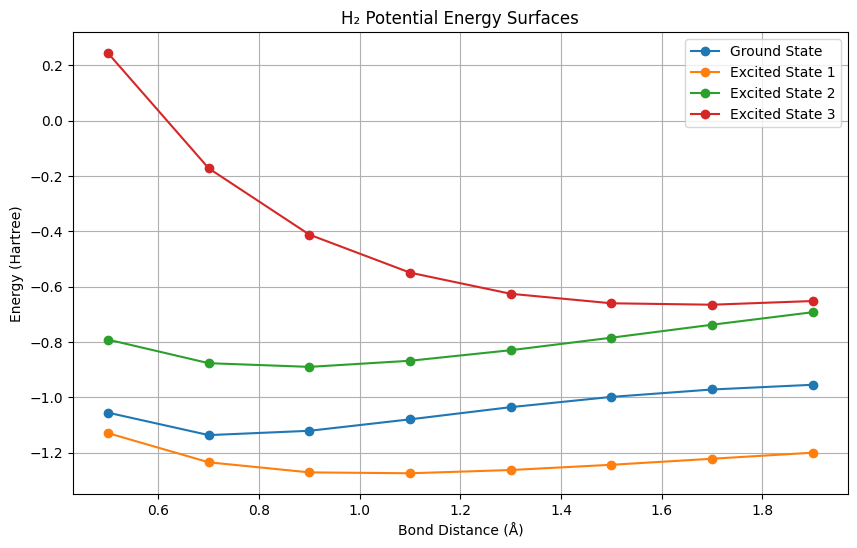

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import ParityMapper
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature.second_q.algorithms import QEOM, EvaluationRule
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit.primitives import Estimator

# Set up the mapper and estimator to be reused in each iteration
mapper = ParityMapper()
numpy_solver = NumPyMinimumEigensolver()
ground_state_solver = GroundStateEigensolver(mapper, numpy_solver)
estimator = Estimator()

# Calculate excited states across different bond distances
distances = np.arange(0.5, 2.1, 0.2)  # Bond distances in Angstroms
ground_energies = []
excited_energies = [[] for _ in range(3)]  # Track first 3 excited states

for distance in distances:
    print(f"Processing distance: {distance} Å")
    
    # Recalculate for each bond distance
    driver = PySCFDriver(
        atom=f'H 0 0 0; H 0 0 {distance}',
        unit=DistanceUnit.ANGSTROM,
        basis='sto3g',
    )
    problem = driver.run()
    
    # Set correct particle number for this problem
    mapper.num_particles = problem.num_particles
    
    # Ground state calculation
    ground_result = ground_state_solver.solve(problem)
    ground_energies.append(ground_result.total_energies[0])  # Store the scalar value
    
    # Excited states calculation with QEOM - note the correct constructor arguments
    qeom_solver = QEOM(
        ground_state_solver,  # Ground state solver
        estimator,           # Quantum estimator
        "sd",                # Single and double excitations
        EvaluationRule.ALL   # Evaluation rules
    )
    
    # Solve with the problem argument
    excited_result = qeom_solver.solve(problem)
    
    # Store energies of excited states - using the correct attribute
    # Skip the first energy (index 0) which is the ground state
    excited_state_energies = excited_result.electronic_energies[1:4]  # Get first 3 excited states
    
    # Store each excited state energy
    for i in range(min(3, len(excited_state_energies))):
        if i < len(excited_state_energies):
            excited_energies[i].append(excited_state_energies[i])
        else:
            excited_energies[i].append(None)  # If this state isn't found

# Plot potential energy surfaces for ground and excited states
plt.figure(figsize=(10, 6))
plt.plot(distances, ground_energies, 'o-', label='Ground State')

for i in range(3):
    if any(energy is not None for energy in excited_energies[i]):
        plt.plot(distances, excited_energies[i], 'o-', label=f'Excited State {i+1}')

plt.xlabel('Bond Distance (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('H₂ Potential Energy Surfaces')
plt.legend()
plt.grid(True)
plt.show()


## 7. Applications of Excited States

Understanding excited states allows us to study:

1. **Absorption Spectra**: The energy differences between ground and excited states determine which wavelengths of light are absorbed

2. **Emission Spectra**: When molecules return from excited to ground states, they emit photons

3. **Photochemical Reactions**: Reactions that occur when molecules absorb light and reach excited states

4. **Fluorescence and Phosphorescence**: Light emission processes from excited states

5. **Electronic Structure**: Understanding how electrons redistribute in excited configurations

## 8. Interpreting Excited States Results

For a simple H₂ molecule with STO-3G basis:

- The ground state has both electrons in the bonding orbital (σ)
- The first excited state typically has one electron promoted to the antibonding orbital (σ*)
- The excitation energy indicates the strength of the bond and relates to UV/visible light absorption

In Hartree atomic units, the energies can be converted to practical units:
- 1 Hartree = 27.211 eV (electron volts)
- 1 eV corresponds to light with wavelength ≈ 1240 nm/eV

## 9. Considerations and Limitations

1. **Computational Cost**: Excited states calculations are more demanding than ground states
   
2. **Accuracy**: Higher excited states often require larger basis sets and more sophisticated techniques

3. **State Crossing**: Where excited states cross or become very close in energy, special care is needed

4. **Entanglement**: Higher excited states may have more entanglement, requiring deeper quantum circuits

5. **Hardware Limitations**: Current NISQ devices may struggle with the circuit depth required

## Conclusion

Calculating excited states with VQE and its extensions represents a frontier in quantum chemistry on quantum computers. These methods enable us to explore molecular phenomena beyond the ground state, opening the door to simulating spectroscopy, photochemistry, and electronic transitions.

As quantum hardware improves, these approaches will become increasingly powerful for studying complex molecular systems, potentially revolutionizing our understanding of light-matter interactions, photosynthesis, vision, and other photochemical processes.
